In [1]:
import pandas as pd
from elasticsearch import Elasticsearch

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
df = pd.read_csv("Book12.csv").loc[:500]

df = df.drop(columns=["date"])
df.head()

,did,text,target,title
0,0,I was wondering if anyone out there could enli...,7,rec.autos
1,17,I recently posted an article asking what kind ...,7,rec.autos
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos
3,56,an excellent automatic can be found in the sub...,7,rec.autos
4,64,: Ford and his automobile. I need information...,7,rec.autos


In [11]:
df.isna()

,did,text,target,title
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False
499,False,False,False,False


In [5]:
%pip install -U sentence_transformers

  Using cached PyYAML-6.0.1-cp37-cp37m-win_amd64.whl (153 kB)
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125956 sha256=d9e57f9580147d3c7b946b8a70ef2b811a91f69d577532cadc529e219571340d
  Stored in directory: c:\users\shilpi giri\appdata\local\pip\cache\wheels\bf\06\fb\d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Shilpi Giri\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [6]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

c:\Users\Shilpi Giri\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
%pip install elasticsearch

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Shilpi Giri\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [20]:
# %pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# import string

# # Assuming you've already loaded your DataFrame 'df'




In [25]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


True

In [27]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
# # 1. Lowercase all text
# df['text'] = df['text'].str.lower()

# # 2. Remove punctuation
# df['text'] = df['text'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))

# # 3. Tokenization
# df['text'] = df['text'].apply(lambda text: word_tokenize(text))

# # 4. Stopword removal

# stop_words = set(stopwords.words('english'))
# df['text'] = df['text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# # 5. Stemming (optional)
# # stemmer = PorterStemmer()
# # df['text'] = df['text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# # 6. Lemmatization

# lemmatizer = WordNetLemmatizer()
# df['text'] = df['text'].apply(lambda tokens: [lemmatizer.lemmatize(word, wordnet.VERB) for word in tokens])

# # You can add additional steps based on your specific requirements like removing digits, handling special characters, etc.

# # Now, df['text'] contains preprocessed text data

# # Optionally, if you want to join the list of tokens back to a string:
# df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))

# # You can access the preprocessed text using df['text']

In [12]:
df['TextDescVec'] = df['text'].apply(lambda x: model.encode(x))

In [34]:
# df.head()["TextDescVec"][2:5]

2    [0.018151965, 0.0066051357, -0.0012481575, 0.0...
3    [-0.02179974, 0.025959788, 0.0039493907, 0.046...
4    [-0.016551258, 0.040353313, 0.001644324, 0.047...
Name: TextDescVec, dtype: object

In [13]:
df.head()

,did,text,target,title,TextDescVec
0,0,I was wondering if anyone out there could enli...,7,rec.autos,"[-0.031229608, 0.003872855, 0.010735834, 0.059..."
1,17,I recently posted an article asking what kind ...,7,rec.autos,"[-0.04411088, 0.055962138, -0.003560291, 0.035..."
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,"[-0.024493609, 0.012514297, 0.009034467, 0.051..."
3,56,an excellent automatic can be found in the sub...,7,rec.autos,"[-0.010271498, -0.004452603, -0.017140277, 0.0..."
4,64,: Ford and his automobile. I need information...,7,rec.autos,"[-0.035531793, 0.029742995, 0.0034254019, 0.06..."


In [14]:
from elasticsearch import Elasticsearch



In [22]:

es = Elasticsearch(
    ['http://localhost:9200/'],
    http_auth=('elastic', 'f8btdQiFjNsqgO3rHjlU')
)
print(es.ping())

True


C:\Users\Shilpi Giri\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The 'http_auth' parameter is deprecated. Use 'basic_auth' or 'bearer_auth' parameters instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
from indexMap import indexMapping
es.indices.create(index="shilpi", mappings=indexMapping)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'shilpi'})

In [24]:
record_list = df.to_dict("records")
print(record_list[0])

{'did': 0, 'text': 'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.', 'target': 7, 'title': 'rec.autos', 'TextDescVec': array([-3.12296078e-02,  3.87285510e-03,  1.07358340e-02,  5.93553670e-02,
       -3.34023796e-02,  1.60941947e-02,  4.34415229e-02,  5.87917790e-02,
        1.69165432e-02, -3.99722978e-02, -3.51731293e-02,  5.63899800e-03,
        1.55021716e-02,  2.91297920e-02,  5.73611036e-02, -2.18862668e-02,
       -3.74932811e-02, -8.65140371e-03,  1.24487011e-02, -2.53817346e-02,
        4.41219099e-02, -2.05373930e-04, -1.67869739e-02,  3.81920929e-

In [25]:
es.ping()

True

In [26]:
for record in record_list:
    # print(record)
    try:
        es.index(index='shilpi', document = record)
    except Exception as e:
        print(e)

In [27]:
print(es.count(index="shilpi"))

{'count': 501, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}}


Using Elasticsearch's standard text-based search (BERT) to retrieve documents based on keywords.

In [66]:
inkey = "windows"
vekey = model.encode(inkey)

query = {
    "field":"TextDescVec",
    "query_vector":vekey,
    "k":100,
    "num_candidates": 500
}

res = es.knn_search(index = "shilpi", knn=query, source =["text", "title", "did"])
res["hits"]["hits"]

C:\Users\Shilpi Giri\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: ElasticsearchWarning: The kNN search API has been replaced by the `knn` option in the search API.
  # This is added back by InteractiveShellApp.init_path()


[{'_index': 'shilpi',
  '_id': 'T9iCf4sB1dZ115fm1GRO',
  '_score': 0.68687755,
  '_source': {'did': 7435,
   'text': 'The idea here is to list pointless options. You know, stuff you\nget on a car that has no earthly use?\n\n\n1) Power windows\n\n\n\nAdd as you wish...\n\nRegards, Charles',
   'title': 'rec.autos'}},
 {'_index': 'shilpi',
  '_id': 'EdiCf4sB1dZ115fmxWN-',
  '_score': 0.6341605,
  '_source': {'did': 800, 'text': '\n', 'title': 'rec.autos'}},
 {'_index': 'shilpi',
  '_id': 'KNiCf4sB1dZ115fmxmOw',
  '_score': 0.6341605,
  '_source': {'did': 1126,
   'text': '\n\n\n\n\n\n\n\n\n\n',
   'title': 'rec.autos'}},
 {'_index': 'shilpi',
  '_id': 'ZtiCf4sB1dZ115fmyWPu',
  '_score': 0.6341605,
  '_source': {'did': 2368, 'text': '\n', 'title': 'rec.autos'}},
 {'_index': 'shilpi',
  '_id': 'rdiCf4sB1dZ115fmzWMU',
  '_score': 0.6341605,
  '_source': {'did': 3886, 'text': '\n', 'title': 'rec.autos'}},
 {'_index': 'shilpi',
  '_id': 'wdiCf4sB1dZ115fmzWP1',
  '_score': 0.6341605,
  '_sourc

In [42]:
import csv

In [64]:
df["title"]

0      rec.autos
1      rec.autos
2      rec.autos
3      rec.autos
4      rec.autos
         ...    
496    rec.autos
497    rec.autos
498    rec.autos
499    rec.autos
500    rec.autos
Name: title, Length: 501, dtype: object

In [65]:
counter = 0
str_to_find = "windows"

# Iterate through the 'text' column and check if 'str_to_find' is present
for text in df["text"]:
    if str_to_find in text:
        counter += 1

print(counter)

9


In [60]:
index_name = 'shilpi'

# Dictionary containing query IDs and their corresponding relevant document IDs
# Replace these with your actual query IDs and relevant document IDs from your ground truth dataset
queries_and_relevant_docs = {
    1: ['atheism'],
    2: ['science'],
    # Add more query IDs and relevant document IDs as needed
}

# List to store precision and recall results
results = []

# Calculate precision and recall for each query
for query_id, relevant_docs in queries_and_relevant_docs.items():
    # Retrieve documents from Elasticsearch for the current query
    response = es.search(index=index_name, body={
        "query": {
            "match": {
                "text": "your_query_text_here"
            }
        }
    })
    
    # Calculate precision and recall
    retrieved_docs = [hit['_id'] for hit in response['hits']['hits']]
    intersection = len(set(retrieved_docs) & set(relevant_docs))
    precision = intersection / len(retrieved_docs) if len(retrieved_docs) > 0 else 0
    recall = intersection / len(relevant_docs) if len(relevant_docs) > 0 else 0
    
    # Print or store the results
    print(f"Query {query_id}: Precision={precision:.2f}, Recall={recall:.2f}")
    
    # Store results in the list
    results.append({'Query_ID': query_id, 'Precision': precision, 'Recall': recall})

# Write results to a CSV file
csv_file = 'precision_recall_results.csv'
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Query_ID', 'Precision', 'Recall']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for result in results:
        writer.writerow(result)

print(f"Precision and recall results have been stored in '{csv_file}'.")

Query 1: Precision=0.00, Recall=0.00
Query 2: Precision=0.00, Recall=0.00
Precision and recall results have been stored in 'precision_recall_results.csv'.


In [68]:
import os

In [71]:
query = inkey

# Retrieve relevant documents from Elasticsearch
response = es.search(index="shilpi", body={"query": {"match": {"field_name": query}}})
search_results = response['hits']['hits']

# Extract relevant document IDs from the search results
relevant_document_ids = [hit['_id'] for hit in search_results]

In [73]:
def calculate_precision_at_k(results, relevant_docs, k):
    relevant_results = [result['_id'] in relevant_docs for result in results[:k]]
    precision_at_k = sum(relevant_results) / k
    return precision_at_k

def calculate_recall_at_k(results, relevant_docs, k):
    relevant_results = [result['_id'] in relevant_docs for result in results[:k]]
    recall_at_k = sum(relevant_results) / len(relevant_docs)
    return recall_at_k

def calculate_map(results, relevant_docs):
    avg_precision = 0
    num_relevant_results = 0
    for i, result in enumerate(results):
        if result['_id'] in relevant_docs:
            num_relevant_results += 1
            avg_precision += num_relevant_results / (i + 1)
    map_score = avg_precision / len(relevant_docs)
    return map_score

def calculate_ndcg(results, relevant_docs, k):
    dcg = sum(1 / (i + 1) for i, result in enumerate(results[:k]) if result['_id'] in relevant_docs)
    idcg = sum(1 / (i + 1) for i in range(min(k, len(relevant_docs))))
    ndcg = dcg / idcg
    return ndcg

# Calculate metrics
k = 10  # Number of top results to consider
precision_at_k = calculate_precision_at_k(search_results, relevant_document_ids, k)
recall_at_k = calculate_recall_at_k(search_results, relevant_document_ids, k)
map_score = calculate_map(search_results, relevant_document_ids)
ndcg = calculate_ndcg(search_results, relevant_document_ids, k)

# Print metrics
print(f"Precision@{k}: {precision_at_k}")
print(f"Recall@{k}: {recall_at_k}")
print(f"Mean Average Precision: {map_score}")
print(f"Normalized Discounted Cumulative Gain@{k}: {ndcg}")


ZeroDivisionError: division by zero

In [48]:
# def preprocess(input_key):
#     input_key = input_key.lower()
#     input_key = input_key.translate(str.maketrans('', '', string.punctuation))
#     input_key = word_tokenize(input_key)
#     input_key = [word for word in input_key if word not in stop_words]
#     input_key = [lemmatizer.lemmatize(word, wordnet.VERB) for word in input_key]
#     input_key = ' '.join(input_key)
#     return input_key

In [45]:
# import random
# with open('random_sentences.txt', 'w') as file:
#     for _ in range(100):
#         sentence = "This is a random sentence. " + ''.join(random.choices(string.ascii_letters + ' ', k=50))
#         file.write(sentence + '\n')

In [80]:
# mega_ret=[]
# mega_rel=[]
# user_query = []
# with open('random_sentences.txt', 'r') as input_file:
#     with open('preprocessed_sentences.txt', 'w') as output_file:
#         for line in input_file:
#             user_query.append(line.strip())
#             preprocessed_line = preprocess(line)
#             vector_ik = model.encode(preprocessed_line)

#             query = {
#                 "field":"TextDescVec",
#                 "query_vector":vector_ik,
#                 "k": 10,
#                 "num_candidates": 1000,
#             }

#             did_list = []

#             res = es.knn_search(index = "prefinal", knn=query, source=["did","title","text"])
#             for result in res["hits"]["hits"]:
#                 did = result["_source"]["did"]
#                 did_list.append(did)
#             mega_ret.append(did_list)

#             matched_dids = []

#             query_words =  preprocessed_line.split()
#             for index, row in df.iterrows():
#                 text = row['text']
#                 for word in query_words:
#                     if word in text:
#                         matched_dids.append(row['did'])
#                         break

#             mega_rel.append(matched_dids)


#             output_file.write(preprocessed_line + '\n')

C:\Users\asus\AppData\Local\Temp\ipykernel_37984\184227352.py:20: ElasticsearchWarning: The kNN search API has been replaced by the `knn` option in the search API.
  res = es.knn_search(index = "prefinal", knn=query, source=["did","title","text"])


In [78]:
# intersection=[]
# precision=[]
# recall=[]
# for sublist_A, sublist_B in zip(mega_ret, mega_rel):
#     sublist_intersection = list(set(sublist_A) & set(sublist_B))
#     intersection.append(sublist_intersection)
#     precision.append(len(sublist_intersection) / len(sublist_A) if len(sublist_A) > 0 else 0)
#     recall.append(len(sublist_intersection) / len(sublist_B) if len(sublist_B) > 0 else 0)

In [81]:
# print(mega_ret)
# print(mega_rel)
# print(intersection)
# print(precision)
# print(recall)
# print(user_query)

[[3472, 6974, 9907, 7313, 7336, 3140, 2485, 3243, 3942, 9341], [7435, 217, 7696, 2088, 7492, 2938, 46, 6417, 4923, 6355], [7336, 800, 1126, 2368, 3886, 4333, 9290, 10508, 1089, 1714]]
[[1595, 3472, 3678, 4356, 7113, 10060, 10695, 293, 550, 5013, 5102, 6069, 7203, 7797, 8111], [17, 592, 1111, 1144, 1214, 1514, 1852, 1901, 2004, 2275, 2363, 2461, 2485, 2562, 3226, 3819, 3879, 3967, 4335, 4628, 4659, 5337, 5724, 5752, 5769, 5851, 6141, 6224, 6268, 6696, 6736, 6871, 7435, 8015, 8162, 8509, 9117, 9236, 9460, 9498, 9503, 10773, 10939, 11185, 11291, 122, 214, 217, 305, 645, 813, 1145, 1270, 1377, 1652, 1684, 1792, 1895, 1929, 2069, 2116, 2133, 2231, 2378, 2495, 2673, 2704, 2949, 3195, 3357, 3419, 3878, 4058, 4103, 4359, 4478, 4488, 4652, 4683, 4704, 4707, 4736, 4754, 4923, 5013, 5097, 5102, 5509, 5529, 5660, 5723, 6069, 6355, 6399, 6447, 6501, 6579, 6624, 6686, 6687, 6693, 6882, 7457, 7458, 7492, 7696, 7797, 7845, 7947, 7980, 8041, 8061, 8101, 8244], []]
[[3472], [7492, 7435, 7696, 6355, 217,

In [84]:
# import csv
# csv_file = 'output_prefinal.csv'

# # Combine the lists into a list of rows
# data = list(zip(user_query, precision, recall))

# # Write the data to a CSV file
# with open(csv_file, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Query', 'Precision', 'Recall'])  # Write header
#     writer.writerows(data)

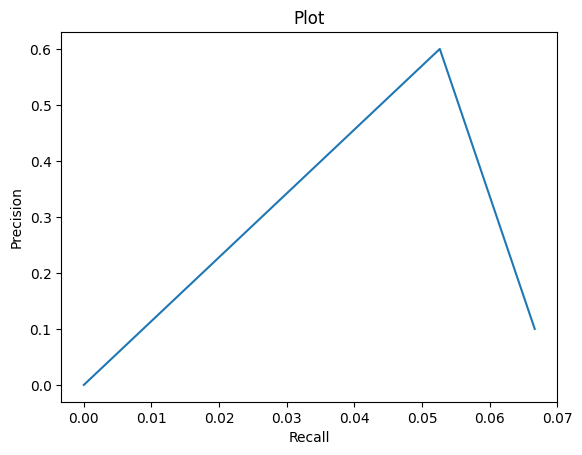

In [76]:
# import matplotlib.pyplot as plt

# plt.plot(recall, precision)

# # Add labels and a title
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Plot')

# # Display the plot
# plt.show()

In [56]:
input_key = "windows is a operating system"
# input_key = input_key.lower()

# 2. Remove punctuation
# input_key = input_key.translate(str.maketrans('', '', string.punctuation))

# 3. Tokenization
# input_key = word_tokenize(input_key)


# input_key = [word for word in input_key if word not in stop_words]

# # 5. Lemmatization
# # nltk.download('wordnet')
# # lemmatizer = WordNetLemmatizer()
# input_key = [lemmatizer.lemmatize(word, wordnet.VERB) for word in input_key]

# You can add additional steps based on your specific requirements like removing digits, handling special characters, etc.

# Optionally, if you want to join the list of tokens back to a string:
# input_key = ' '.join(input_key)
# print(input_key)






vector_ik = model.encode(input_key)

query = {
    "field":"TextDescVec",
    "query_vector":vector_ik,
    "k": 10,
    "num_candidates": 500,
}
did_list = []

# Iterate through the search results and extract 'did' values


res = es.knn_search(index = "prefinal", knn=query, source=["did","title","text"])
for result in res["hits"]["hits"]:
    did = result["_source"]["did"]
    did_list.append(did)
print(did_list)
# res["hits"]["hits"]

[217, 7435, 7793, 7296, 7696, 5530, 428, 2088, 1825, 9341]


C:\Users\asus\AppData\Local\Temp\ipykernel_37984\1936790875.py:42: ElasticsearchWarning: The kNN search API has been replaced by the `knn` option in the search API.
  res = es.knn_search(index = "prefinal", knn=query, source=["did","title","text"])
